In [1]:
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import numpy as np
import scipy.stats as scs
from arch import arch_model
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
#正常显示画图时出现的中文和负号
from pylab import mpl


In [2]:
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
timestamp = str(time.time())
def ts_plot(data, lags=None,title=''):
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    
    with plt.style.context('ggplot'):
        fig = plt.figure(figsize=(10, 8))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    pp_ax = plt.subplot2grid(layout, (2, 1))
    data.plot(ax=ts_ax)
    ts_ax.set_title(title+'time')
    smt.graphics.plot_acf(data, lags=lags,
    ax=acf_ax, alpha=0.5)
    acf_ax.set_title('auto correlation')
    smt.graphics.plot_pacf(abs(data), lags=lags,
    ax=pacf_ax, alpha=0.5)
    pacf_ax.set_title('absolute auto correlation')
    sm.qqplot(data, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Curve')
    scs.probplot(data, sparams=(data.mean(),
    data.std()), plot=pp_ax)
    pp_ax.set_title('PP Curve')
    plt.tight_layout()
    # plt.savefig('./stat/'+timestamp+'T'+str(T)+'stats.png')
#     plt.savefig('./stat/'+timestamp+'stats.png')
    plt.show()
    return

In [3]:

def return_series(log_p_series):
    log_return_series = log_p_series[1:] - log_p_series[:-1]
    #absolute_return_series = np.exp(np.log(10)*p_series[1:]) - np.exp(np.log(10)*p_series[:-1])
    return log_return_series#, absolute_return_series



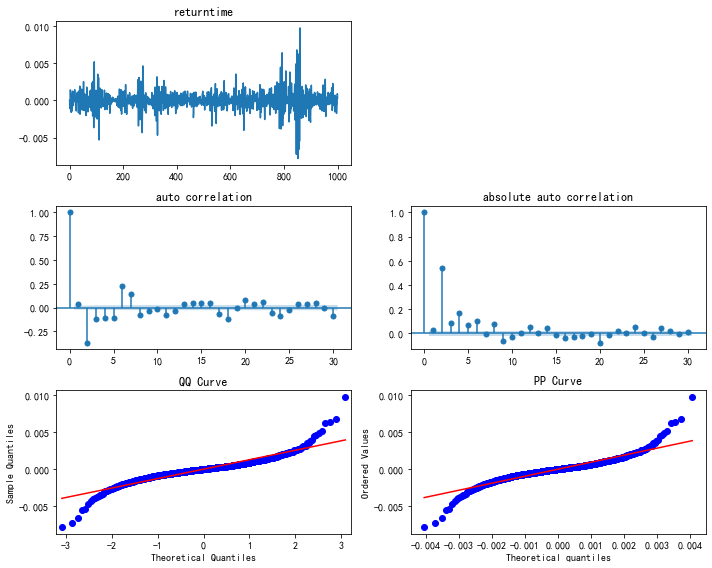

In [4]:

p_data = np.load('test.npy').squeeze()
ts_plot(return_series(np.log10(p_data)),lags=30,title='return')
#ts_plot(return_series(np.log10(hs300)),lags=30,title='沪深300收益率')



### 自己生成的序列的收益率图

In [5]:

p_data = np.load('./tr_save_more1_bad7/price_series.npy')
print(p_data.shape)

FileNotFoundError: [Errno 2] No such file or directory: './tr_save_more1_bad7/price_series.npy'

In [ ]:


plt.figure(figsize=(12,6))
for i in range(p_data.shape[0]):
    plt.plot(p_data[i,:],label=str(i)+' price')
plt.legend()
plt.show()

In [ ]:
ts_plot(return_series(np.log10(p_data[1,:])),lags=30,title='return')